In [2]:
library(ggplot2)
library(ggmsa)
library(seqinr)
library(Biostrings)

library(ggtree)
library(ape)
library(phylotools)

library(dplyr)

library(shadowtext)

library(ggseqlogo)

library(seqinr)

# CCDC8 TIS-sequence LOGO in mammals 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


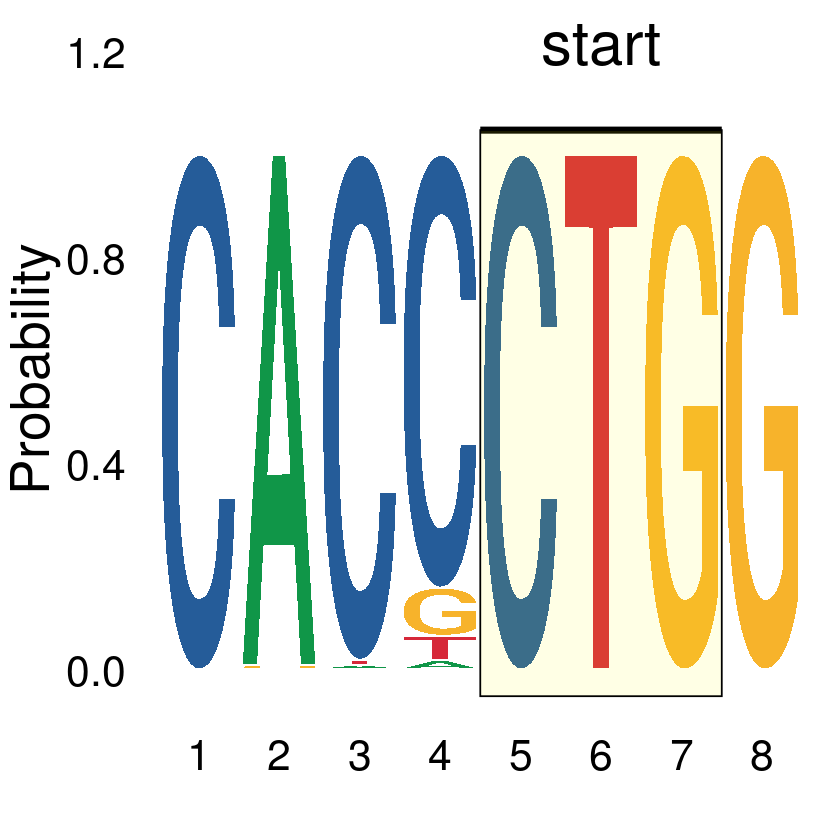

In [18]:
s <- readDNAStringSet("tmp_res/CCDC8/tis.fasta")

q <- ggplot() + 
  #annotate('rect', xmin = 4.5, xmax = 7.5, ymin = -0.05, ymax = 1.03, 
  #         alpha = .1, col='black', fill='yellow') +
  geom_logo(paste(s), stack_width = 0.90, method = 'prob',
           seq_type='dna')+ 
  theme_logo() + 
  theme(text = element_text(size=32)) +
  annotate('segment', x = 4.5, xend=7.5, y=1.05, yend=1.05, size=2) + 
  annotate('text', x=6, y=1.22, label='start', size=13) +
  annotate('rect', xmin = 4.5, xmax = 7.5, ymin = -0.05, ymax = 1.05, 
           alpha = .1, col='black', fill='yellow')

ggsave(filename = "tmp_res/CCDC8/logo_prob.png", q,
       width = 6, height = 3, dpi = 300, units = "in", device='png')

q

# GTF3A TIS-sequence LOGO in mammals 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


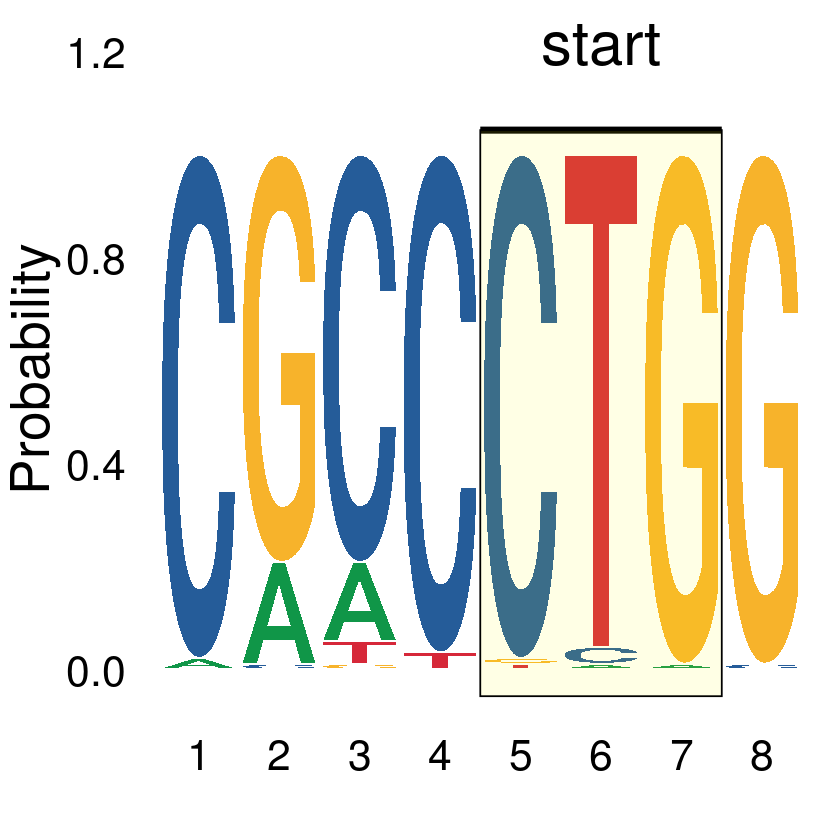

In [19]:
s = readDNAStringSet("data/GTF3A_tis.fasta")

q <- ggplot() + 
  #annotate('rect', xmin = 4.5, xmax = 7.5, ymin = -0.05, ymax = 1.03, 
  #         alpha = .1, col='black', fill='yellow') +
  geom_logo(paste(s), stack_width = 0.90, method = 'prob',
           seq_type='dna')+ 
  theme_logo() + 
  theme(text = element_text(size=32)) +
  annotate('segment', x = 4.5, xend=7.5, y=1.05, yend=1.05, size=2) + 
  annotate('text', x=6, y=1.22, label='start', size=13) +
  annotate('rect', xmin = 4.5, xmax = 7.5, ymin = -0.05, ymax = 1.05, 
           alpha = .1, col='black', fill='yellow')

ggsave(filename = "tmp_res/GTF3A.png", q,
       width = 6, height = 3, dpi = 300, units = "in", device='png')

q

# Global coo transformation for starts: non-AUG, CUG, 5'leaders

In [20]:
library(dplyr)
library(GenomicFeatures)

# this scripts transform local (transcriptomic) coordinates of extensions into global (genomic) coordinates using .gtf file. 
txdb <- makeTxDbFromGFF('/home/alla/make_PhD_great_again/NTE/VERSION_since_May2021/data/gencode.v25.annotation.gtf')

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: AnnotationDbi

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select


Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK



In [ ]:
cr <- read.csv('starts_local_coo.txt',  sep='\t', stringsAsFactors = FALSE)

head(cr)

In [ ]:
tr_names <- cr$tr_id
start <- cr$codon_start + 1 - 3  # start - tripelt 
end <- cr$codon_start + 3 + 3 # start + triplet 

exons <- exonsBy(txdb, by="tx", use.names=TRUE)[tr_names]
x <- GRanges(tr_names, IRanges(start=start, end=end)) #,  
out <- data.frame(pmapFromTranscripts(x, exons))
write.table(out, 'nonAUG_plus_minus_triplet_global.txt', sep='\t')

In [ ]:
tr_names <- cr$tr_id
start <- cr$cds_start + 1 - 3  # start - tripelt 
end <- cr$cds_start + 3 + 3 # start + triplet 

exons <- exonsBy(txdb, by="tx", use.names=TRUE)[tr_names]
x <- GRanges(tr_names, IRanges(start=start, end=end)) #,  
out <- data.frame(pmapFromTranscripts(x, exons))
write.table(out, 'AUG_plus_minus_triplet_global.txt', sep='\t')

In [ ]:
cr <- read.csv('local_5leaders.txt',  sep='\t', stringsAsFactors = FALSE)

head(cr)

In [ ]:
tr_names <- cr$tr_id
start <- cr$utr5_start + 1  # start - tripelt 
end <- cr$cds_start_pos -3 # exclude surroundings 

exons <- exonsBy(txdb, by="tx", use.names=TRUE)[tr_names]
x <- GRanges(tr_names, IRanges(start=start, end=end)) #,  
out <- data.frame(pmapFromTranscripts(x, exons))
write.table(out, 'global_5leaders.txt', sep='\t')

# Global coo transformation for separate genes

### RGS19

In [21]:
tr_names <- c('ENST00000395042.1')
start <- c(280-1)  # start - tripelt 
end <- c(550) # exclude surroundings 

exons <- exonsBy(txdb, by="tx", use.names=TRUE)[tr_names]
x <- GRanges(tr_names, IRanges(start=start, end=end)) #,  
out <- data.frame(pmapFromTranscripts(x, exons))
out

group,group_name,seqnames,start,end,width,strand,exon_id,exon_name,exon_rank,hit
<int>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<chr>,<int>,<lgl>
1,ENST00000395042.1,chr20,64079294,64079293,0,-,632707,ENSE00001520399.1,1,FALSE
1,ENST00000395042.1,chr20,64076857,64076875,19,-,632704,ENSE00003668618.1,2,TRUE
1,ENST00000395042.1,chr20,64076525,64076646,122,-,632700,ENSE00003587130.1,3,TRUE
1,ENST00000395042.1,chr20,64074467,64074541,75,-,632698,ENSE00003526437.1,4,TRUE
1,ENST00000395042.1,chr20,64074323,64074378,56,-,632697,ENSE00001171313.1,5,TRUE
1,ENST00000395042.1,chr20,64073181,64073180,0,-,632696,ENSE00001430804.2,6,FALSE


### MT1F

In [22]:
tr_names <- c('ENST00000334350.6')
start <- c(336)  # start - tripelt 
end <- c(366) # exclude surroundings 

exons <- exonsBy(txdb, by="tx", use.names=TRUE)[tr_names]
x <- GRanges(tr_names, IRanges(start=start, end=end)) #,  
out <- data.frame(pmapFromTranscripts(x, exons))
out

group,group_name,seqnames,start,end,width,strand,exon_id,exon_name,exon_rank,hit
<int>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<chr>,<int>,<lgl>
1,ENST00000334350.6,chr16,56658029,56658059,31,+,498293,ENSE00002576619.1,1,TRUE
1,ENST00000334350.6,chr16,56658675,56658674,0,+,498296,ENSE00001745938.1,2,FALSE
1,ENST00000334350.6,chr16,56659073,56659072,0,+,498298,ENSE00002609936.1,3,FALSE


### TRPV6

In [23]:
# CDS
tr_names <- c('ENST00000359396.7')
start <- c(126)  # start - tripelt 
end <- c(2424) # start + triplet 

exons <- exonsBy(txdb, by="tx", use.names=TRUE)[tr_names]
x <- GRanges(tr_names, IRanges(start=start, end=end)) #,  
out <- data.frame(pmapFromTranscripts(x, exons))

out

group,group_name,seqnames,start,end,width,strand,exon_id,exon_name,exon_rank,hit
<int>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<chr>,<int>,<lgl>
1,ENST00000359396.7,chr7,142885389,142885637,249,-,272531,ENSE00001421087.3,1,TRUE
1,ENST00000359396.7,chr7,142877929,142878026,98,-,272530,ENSE00001090578.1,2,TRUE
1,ENST00000359396.7,chr7,142877651,142877773,123,-,272526,ENSE00001090568.1,3,TRUE
1,ENST00000359396.7,chr7,142877142,142877279,138,-,272522,ENSE00002519793.1,4,TRUE
1,ENST00000359396.7,chr7,142876739,142876837,99,-,272519,ENSE00003585242.1,5,TRUE
1,ENST00000359396.7,chr7,142876408,142876583,176,-,272516,ENSE00003492833.1,6,TRUE
1,ENST00000359396.7,chr7,142875758,142875904,147,-,272512,ENSE00003641364.1,7,TRUE
1,ENST00000359396.7,chr7,142875468,142875680,213,-,272509,ENSE00003597667.1,8,TRUE
1,ENST00000359396.7,chr7,142875078,142875164,87,-,272506,ENSE00003560939.1,9,TRUE
